In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# MLP PROJECT

## Name    : M.R.Radha Ruckmani
## Roll No : 22f3000517

## Import required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,MaxAbsScaler,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest,mutual_info_classif,RFE,RFECV
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix,ConfusionMatrixDisplay,classification_report,f1_score,precision_score

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Loading the Train and Test Data

In [5]:
df_train=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
df_test=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

## EDA and Visualisation
### 1.  **Data Structure**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.



####    1.1 *Basic information of the dataset*

  We can observe the following from the above structure
               
* There are totally **39211** rows and **16** features (columns)
* There are **10** features of **Object Datatype**
* There are **6** **integer data type** features
* The column **'target'** is the target column
* There are null values in 4 columns which are **job,education,contact and                   poutcome**
* The target column shows that the clients who have subscribed and not subscribed for the    term deposit
* Its a Binary Classification problem
* We can observe that out of **39211** total clients, **33384**(around 85%) have 
**not  subscribed** for the term deposit. Its highly imbalanced dataset

In [6]:
df_train.head()

last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no

In [7]:
df_test.head()

last contact date  age          job  marital  education default  balance  \
0        2009-11-21   36   management   single   tertiary      no        7   
1        2010-02-04   30   unemployed  married   tertiary      no     1067   
2        2010-07-28   32  blue-collar   single  secondary      no       82   
3        2010-06-09   38       admin.  married    primary      no     1487   
4        2008-03-02   59   management  married   tertiary      no      315   

  housing loan   contact  duration  campaign  pdays  previous poutcome  
0      no   no       NaN        20         1     -1         0      NaN  
1      no   no  cellular        78         2     -1         0      NaN  
2     yes   no  cellular        86         4     -1         0      NaN  
3      no   no       NaN       332         2     -1         0      NaN  
4      no   no  cellular       591         1    176         2  failure

In [8]:
df_train.shape,df_test.shape

((39211, 16), (10000, 15))

In [10]:
cat_col = df_train.select_dtypes(include = "object").columns 
num_col   = df_train.select_dtypes(include = "int").columns 
print("The number of categorical columns is :", len(cat_col))
print("The number of Numerical columns is :", len(num_col))

The number of categorical columns is : 10
The number of Numerical columns is : 6


In [11]:
df_train['target'].value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

#### 1.2 Null value checking

In [12]:
print("The null values in Job column are  : \033[1m",df_train['job'].isna().sum(),"\033[0m")
print("The different types of Jobs are : \033[1m",df_train['job'].unique(),"\033[0m\n")
print("\033[1mThe number of clients in each category of :\033[0m",df_train['job'].value_counts())

The null values in Job column are  :  229 
The different types of Jobs are :  ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan] 

The number of clients in each category of : job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64


In [13]:
print("The null values in education column are  : ","\033[1m",df_train['education'].isna().sum(),"\033[0m")
print("The different types of educational qualification are : ","\033[1m",df_train['education'].unique(),"\033[0m\n")
print("\033[1mThe number of clients in each category of :\033[0m",df_train['education'].value_counts())

The null values in education column are  :   1467 
The different types of educational qualification are :   ['secondary' 'tertiary' 'primary' nan] 

The number of clients in each category of : education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64


In [14]:
print("The null values in poutcome  column are  : ","\033[1m", df_train['poutcome'].isna().sum(),"\033[0m")
print("The different values  of poutcome column are : ","\033[1m",df_train['poutcome'].unique(),"\033[0m")
print("\033[1mThe number of clients in each category of :\033[0m",df_train['poutcome'].value_counts())

The null values in poutcome  column are  :   29451 
The different values  of poutcome column are :   ['other' nan 'failure' 'success'] 
The number of clients in each category of : poutcome
failure    4949
other      2560
success    2251
Name: count, dtype: int64


In [15]:
print("The null values in contact column are  : ","\033[1m",df_train['contact'].isna().sum(),'\033[0m')
print("The different values in contact column are : ","\033[1m",df_train['contact'].unique())
print("\033[1mThe number of clients in each category of :\033[0m",df_train['contact'].value_counts())

The null values in contact column are  :   10336 
The different values in contact column are :   ['cellular' 'telephone' nan]
The number of clients in each category of : contact
cellular     25030
telephone     3845
Name: count, dtype: int64


## 2. Data Visualization

 ###   2.1 Histograms

<Figure size 800x800 with 0 Axes>

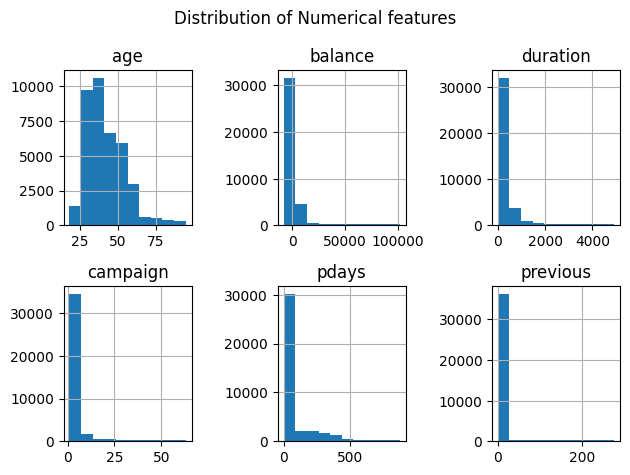

In [16]:
#num_fea = df_train.select_dtypes(exclude='object')
plt.figure(figsize=(8,8))
df_train.hist(layout=(2,3))
#num_fea.hist(layout=(2,3))
plt.suptitle("Distribution of Numerical features")
plt.tight_layout()
plt.show()

### Insights 

#### The above histogram plots show us the distribution,skewness and outliers of the data of numerical columns.

#### **age** 

- Most of the clients are in the age bracket of 25 to 60.
- Very less people are older than 75 years


#### **balance**

- This column has a very long tail on the right side. Its highly right
  skewed. Most of the clients have a zero balance or very less balance
- Few of them have very high balance which is an outlier

#### **duration**

- Again duration has most of the values closer to 0 which indicates
  that the call duration is very short in most of the cases

- There are a few cases where the duration is much higher to the tunes of more than an hour , which may be outliers


#### **campaign:**
  
  - Most people have been contacted very few times in this campaign.
    (with 0-5 being the most common). There are very few clients who have been contacted more than 10 times

#### **pdays** :

  - The plot shows that most of the pdays value near 0, meaning they
    were either recently contacted or had not been contacted in a previous campaign.
  - Very few numbers show higher pdays values, indicating that its been
    many days since they have been contacted previously.

#### **previous**

 - Most clients have been contacted very few times in the past as most
   of the values are closer to 0


### 2.2 'target' column distribution 

target
no     33384
yes     5827
Name: count, dtype: int64

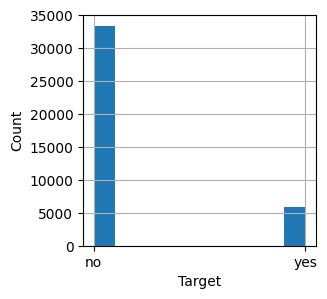

In [17]:
plt.figure(figsize=(3,3))
df_train.target.hist()
plt.xlabel('Target')
plt.ylabel('Count')
df_train['target'].value_counts()

#### Insights

 
  * We can observe from the graph most of the clients have ***not subscribed*** for the         Term deposit.
  * This is highly imbalanced dataset


####    2.3 Correlation Heat Map 

<Axes: >

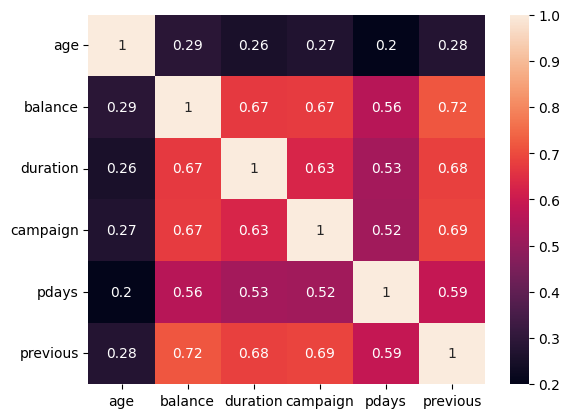

In [18]:
num_fea=df_train.select_dtypes(exclude = 'object')
sns.heatmap(df_train[num_fea.columns].corr(),annot=True)

#### Insights

* The above heat map shows the correlation of all the 6 numerical features.
* The **age** feature doesnt have any correlation with any of the other features
* The **balance** has a maximum positive correlation (0.72) with **previous**                feature and moderately correlated with **campaign** and **duration**.This shows that persons with higher balances have been contacted more in the previous campaign and also spoken for a longer duration 

### 2.4 Pair Plot 

<Figure size 800x800 with 0 Axes>

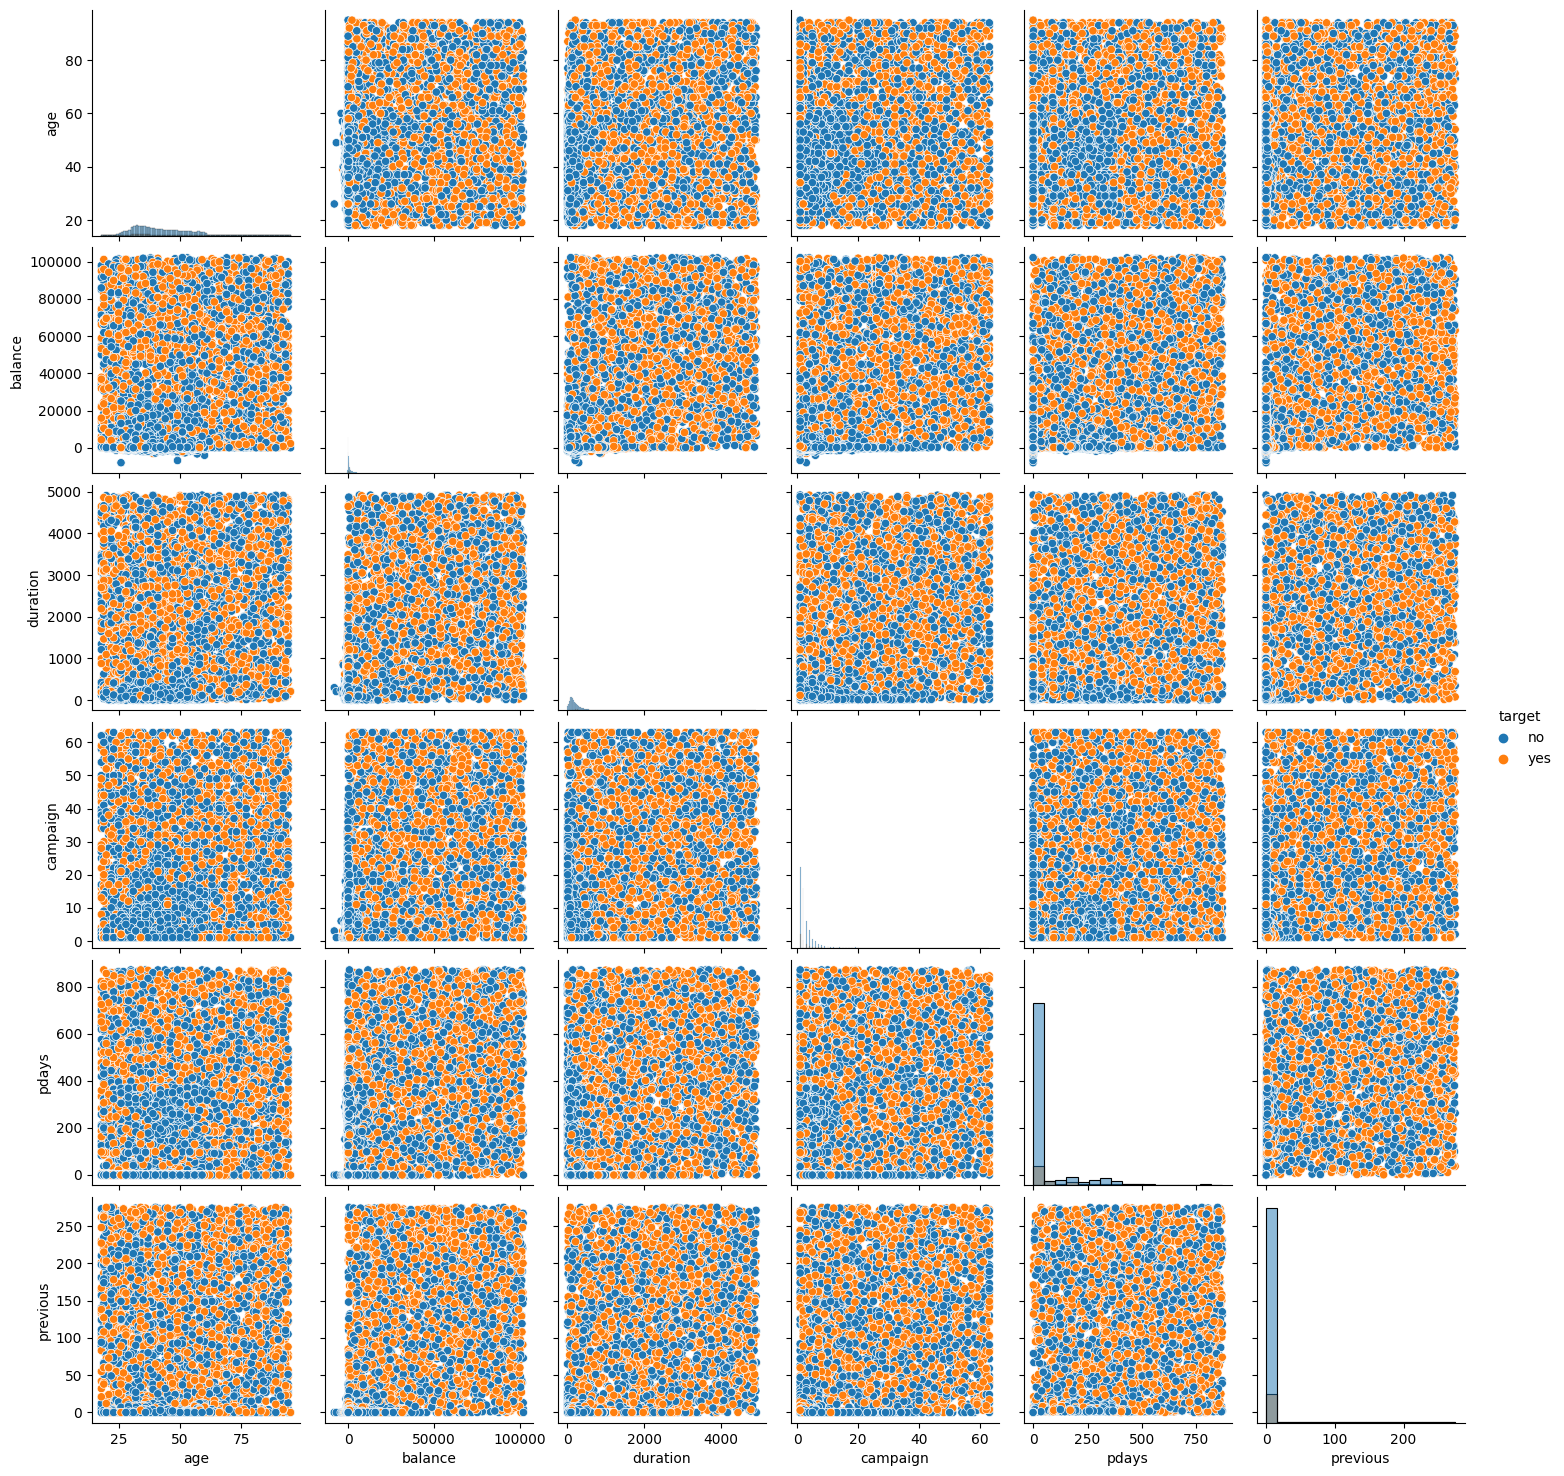

In [6]:
plt.figure(figsize=(8,8))
sns.pairplot(df_train, diag_kind="hist",hue='target')
plt.show()

**There is no specific pattern that can be observed in the above pair plot between each of the numerical variables**

### 2.5 Scatter Plot


####    2.5.1. ***Campaign Vs Duration***

<Axes: xlabel='campaign', ylabel='duration'>

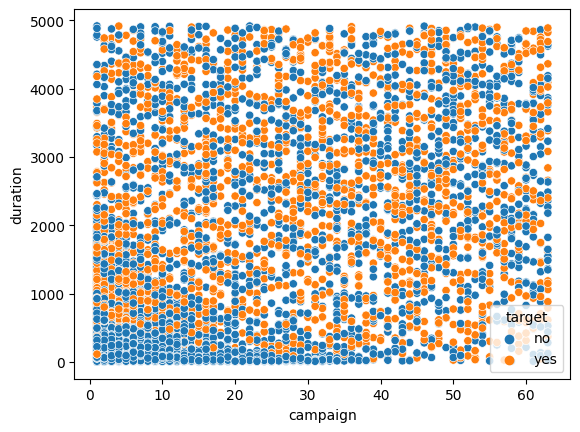

In [7]:
sns.scatterplot(x=df_train['campaign'],y=df_train['duration'], hue=df_train['target'])

#### Insights :

* The scatter plot doesnt show any significant pattern to distinguish between the            target - **yes** and target - **no**.
* For **lower** values of **campaign** and **duration**, the term deposit is **not**         subscribed.
* Even more number of campaigns, there seems to be more of **'No'** than **'yes'** which     means** higher campaign values has not helped the bank to get clients**.
* If the **duration is high**, there seems to be more **'Yes'**(subscribers)


####    2.5.2. ***Campaign Vs Balance***

In [ ]:
sns.scatterplot(x=df_train['campaign'],y=df_train['balance'], hue=df_train['target'])

#### Insights :

 * There seems to be a mix of 'yes' and 'no' at all values of yearly balance implying         that **balances** really **does not** have much impact on the target. 
 * But **Lesser** the average yearly **balance** or balance close to zero, they have **not    subscribed** for the term deposit
 * Even contacting the client multiple times has not helped to grab the subscriber

####    2.5.3. ***Campaign Vs Age***

<Axes: xlabel='age', ylabel='campaign'>

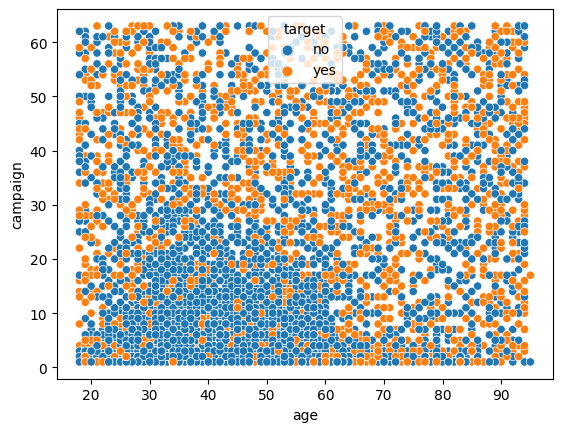

In [8]:
sns.scatterplot(x=df_train['age'],y=df_train['campaign'], hue=df_train['target'])

#### Insights :

   * The clients in the age bracket of **30 - 60** have **not subscribed** for **lesser**       number of **campaigns**. 
   * More **'yes'** above**60 years** of age irrespective of the number of campaigns. 

####    2.5.4. ***Campaign Vs previous***

<Axes: xlabel='previous', ylabel='campaign'>

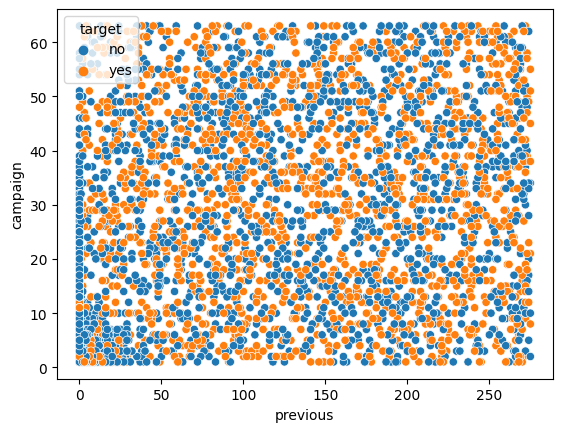

In [9]:
sns.scatterplot(x=df_train['previous'],y=df_train['campaign'], hue=df_train['target'])

#### Insights :

* Even with lesser number of previous contacts, people have subscribed in this campaign

* There are mix of **'yes**' and **'no**' as the value of '**previous**' increases           with little higher proportion of '**No**'. This shows more number of contacts in           the previous campaign has discouraged the people to take the term deposit
    
* When the values of both **campaign** and **previous** are moderate, there are more         subscribers (yes) which implies to avoid higher contacts in any campaign.

### 2.6 Bar plots

####  2.6.1 *Job Vs Target*   

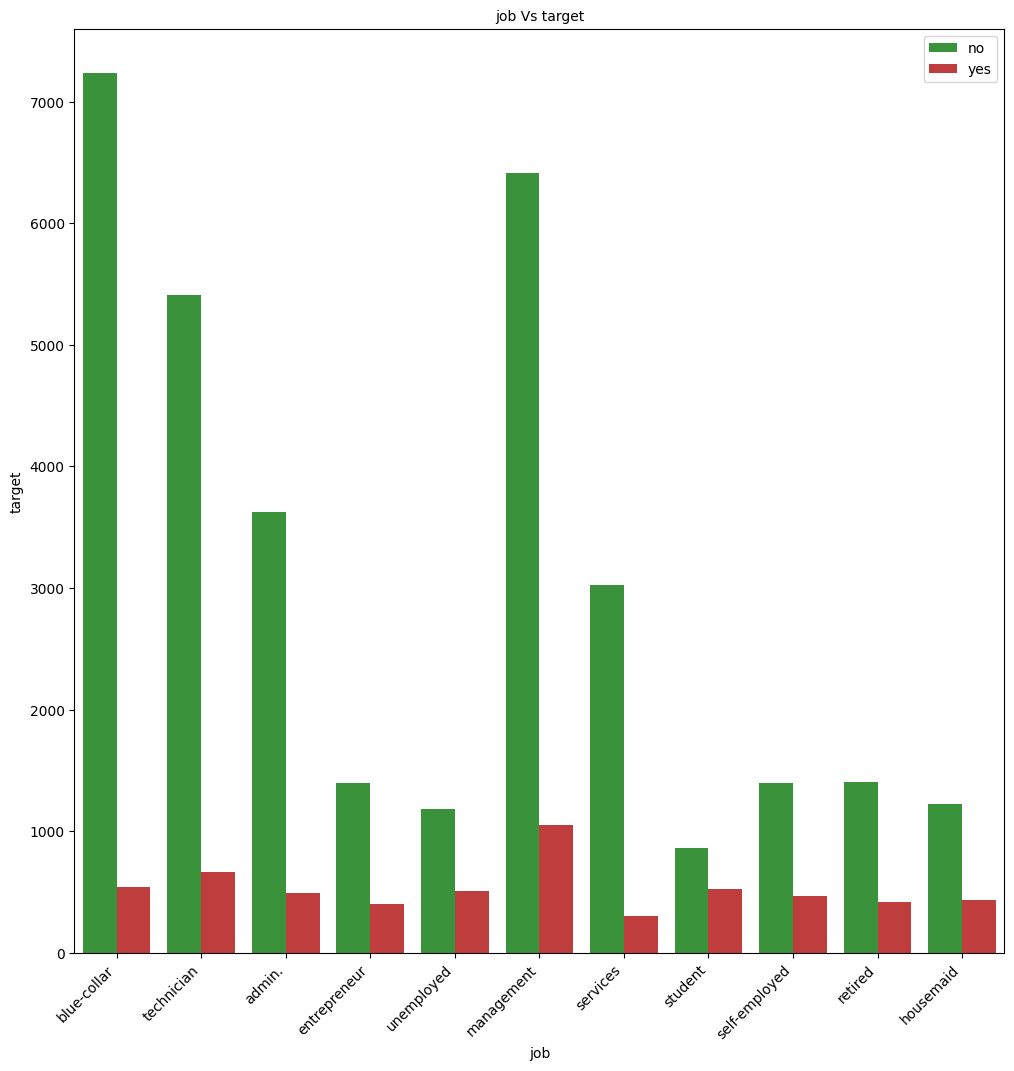

In [10]:
plt.figure(figsize=(12,12))
sns.countplot(x='job',hue = 'target',data=df_train,palette=['#2ca02c', '#d62728'])

plt.xlabel('job',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('job Vs target',fontsize=10)
#plt.xticks(rotation='horizontal')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

#### Insights :

* From this plot, we observe that people working in **Management** segment are the 
  **top subscribers** and the **non subscribers** are highest in **blue collar** jobs 
       
* Those working in  **services** segment are the least subscribers and **students** are      least non subscribers

#### 2.6.2 *Bar Plot of Target Vs education,loan,housing and default*

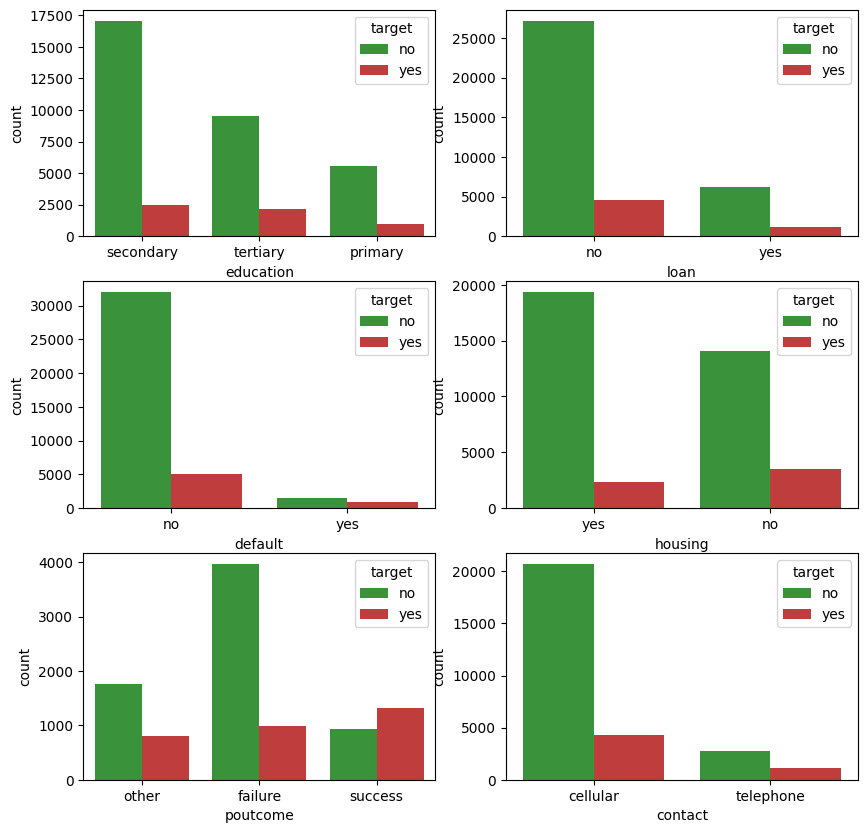

In [11]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(321)
#ax.title.set_text('education Vs target')
sns.countplot(x='education',hue = 'target',data=df_train, palette=['#2ca02c', '#d62728'])

ax = fig.add_subplot(322)
#ax.title.set_text('loan')
sns.countplot(x='loan',hue = 'target',data=df_train, palette=['#2ca02c', '#d62728'])

ax = fig.add_subplot(323)
#ax.title.set_text('default')
sns.countplot(x='default',hue = 'target',data=df_train,palette=['#2ca02c', '#d62728'])

ax = fig.add_subplot(324)
#ax.title.set_text('housing')
sns.countplot(x='housing',hue = 'target',data=df_train,palette=['#2ca02c', '#d62728'])

ax = fig.add_subplot(325)
#ax.title.set_text('Poutcome')
sns.countplot(x='poutcome',hue = 'target',data=df_train,palette=['#2ca02c', '#d62728'])

ax = fig.add_subplot(326)
#ax.title.set_text('Contact')
sns.countplot(x='contact',hue = 'target',data=df_train,palette=['#2ca02c', '#d62728'])





plt.show()

#### Insights :

#####  **Relationship between target and**
* **Education**
  
     Those who have done their secondary education are the top subscribers
     Those who have done their primary education are least susbcribers

* **Loan** : Persons who do not have personal loan are the top subscribers as they dont                 have liability
  
* **Default** :
     Those who are not credit defaulters are the highest subscribers
  
* **Housing** : 
     Those who dont have housing loan are top subscribers

* **poutcome**

     - ***Failure*** : Under this label, which is highest in the graph, the current campaign outcome of **No** is **more**. This means the person's who didnt subscribe in the previous campaign have not subscribed in this campaign too.The number of **Yes** is very **low** here.
     - ***Success*** : Under this label, "**yes**" appears marginally more than **No**, meaning not all those who have subscribed in the previous campaign,have subscribed in this. 
     - ***Other*** : In this category too, the **NO**s are outnumbering the **Yes**'
       
     - **This shows the outcome of previous campaign has an impact on the outcome of the current campaign**
 
* **Contact**
     - More subscribers when contacted through mobile. It could be because most of the contact have been established through mobile phones than telephones
         


  

## 3. Descriptive Statistics

In [12]:
df_train.describe().T

count         mean           std     min    25%    50%     75%  \
age       39211.0    42.120247     12.709352    18.0   33.0   40.0    50.0   
balance   39211.0  5441.781719  16365.292065 -8019.0   98.0  549.0  2030.0   
duration  39211.0   439.062789    769.096291     0.0  109.0  197.0   380.0   
campaign  39211.0     5.108770      9.890153     1.0    1.0    2.0     4.0   
pdays     39211.0    72.256051    160.942593    -1.0   -1.0   -1.0    -1.0   
previous  39211.0    11.826171     44.140259     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

 **Age** - The mean age is **42.120247**. 
  * Age has a wide range from **18 - 95**.
  * The 25,50 and 75th percentile are in the range of **30-50** show that most of the clients are **middle aged**

 **Balance**  
  * Some people have negative balance and the **maximum** balance is **102127**
  * 75th percentile of the people have balance of 2030.0 which is lesser than mean. This explains that the data is **highly skewed**

 **duration** 
  * The **mean** call **duration** is **439** seconds with minimum of 0 secs (which means didnt establish the call)
  * **Maximum** value is **4918** seconds which is as high as more than one hr.
  * The **variance** is very **high** indicating **wide range of call duration**

 **campaign** 
  * There is high variation with minimum value 1 and maximum at 63.
  * The median is 2, means 50% of the people have recieved around 2 calls 

 **pdays** 
  * The values of 25,50,75th percentile are -1 which means **larger number of clients          have not been contacted previously**

**Previous** 
  * The average number of times a person is contacted previously is 12.
  * Most of the values (25,50,75) are 0 which explains that large chunk of people have not
    been contacted previously .
  * **Maximum** number is **275** which shows some of them are **contacted several times**.

###  Box plots to check outliers

In [13]:
# fig = plt.figure(figsize=(12,8))

# ax = fig.add_subplot(231)
# ax.title.set_text('Age')
# #sns.boxplot(data=df_train['age'])
# sns.boxplot(data=X_train['age'])

# ax = fig.add_subplot(232)
# ax.title.set_text('Balance')

# #sns.boxplot(data=df_train['balance'])
# sns.boxplot(data=X_train['balance'])

# ax = fig.add_subplot(233)
# ax.title.set_text('Duration')
# sns.boxplot(data=X_train['duration'])
# #sns.boxplot(data=df_train['duration'])

# ax = fig.add_subplot(234)
# ax.title.set_text('Campaign')
# #sns.boxplot(data=df_train['campaign'])
# sns.boxplot(data=X_train['campaign'])

# ax = fig.add_subplot(235)
# ax.title.set_text('Pdays')
# #sns.boxplot(data=df_train['pdays'])
# sns.boxplot(data=X_train['pdays'])

# ax = fig.add_subplot(236)
# ax.title.set_text('Previous')
# #sns.boxplot(data=df_train['previous'])
# sns.boxplot(data=X_train['previous'])

# plt.show()

#### Insights :

 
* **Age** column has very few outliers in the range of 70 - 90 years.
  
*   All other columns like **balance**,**duration**  **campaign**, **pdays** and  **previous**  have lots of outliers



## 4. Data Preprocessing and Feature Engineering

#### 4.1 Splitting of last contact date



  * Convert **last contact date**  column to **datetime** datatype

  * Split it into **date,month** and **year**. Extracting the information **day of the           week** and **month name**.

  * Drop date column
     

In [14]:
df_train['last contact date']= pd.to_datetime(df_train['last contact date'])
df_train['year']= df_train['last contact date'].dt.year
df_train['month']=df_train['last contact date'].dt.month
df_train['day']= df_train['last contact date'].dt.day
df_train['day_name']=df_train['last contact date'].dt.day_name()
df_train['month_name']=df_train['last contact date'].dt.month_name()


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  39211 non-null  datetime64[ns]
 1   age                39211 non-null  int64         
 2   job                38982 non-null  object        
 3   marital            39211 non-null  object        
 4   education          37744 non-null  object        
 5   default            39211 non-null  object        
 6   balance            39211 non-null  int64         
 7   housing            39211 non-null  object        
 8   loan               39211 non-null  object        
 9   contact            28875 non-null  object        
 10  duration           39211 non-null  int64         
 11  campaign           39211 non-null  int64         
 12  pdays              39211 non-null  int64         
 13  previous           39211 non-null  int64         
 14  poutco

In [16]:
df_train=df_train.drop('last contact date',axis=1)
df_train.shape

(39211, 20)

In [17]:
df_train.head()

age           job  marital  education default  balance housing loan  \
0   26   blue-collar  married  secondary      no      647     yes   no   
1   52    technician  married  secondary      no      553     yes   no   
2   44   blue-collar  married  secondary      no     1397      no   no   
3   33        admin.  married  secondary      no      394     yes   no   
4   31  entrepreneur   single   tertiary      no      137      no   no   

     contact  duration  campaign  pdays  previous poutcome target  year  \
0   cellular       357         2    331         1    other     no  2009   
1  telephone       160         1     -1         0      NaN     no  2009   
2   cellular       326         1     -1         0      NaN     no  2010   
3  telephone       104         3     -1         0      NaN     no  2009   
4   cellular       445         2     -1         0      NaN     no  2008   

   month  day  day_name month_name  
0      4   17    Friday      April  
1     10   11    Sunday    October  
2     11   20  Saturday   November  
3      9    1   Tuesday  September  
4      1   29   Tuesday    January

# Handling outliers

In [18]:
# IQR = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
# lower_bound = df_train['age'].quantile(0.25)-1.5*IQR  
# upper_bound = df_train['age'].quantile(0.75)+1.5*IQR  
# # Cap the outliers
# df_train['age'] = df_train['age'].clip(lower=lower_bound, upper=upper_bound)
# df_test['age'] = df_test['age'].clip(lower=lower_bound, upper=upper_bound)


# IQR = df_train['balance'].quantile(0.75) - df_train['balance'].quantile(0.25)
# lower_bound = df_train['balance'].quantile(0.25)-1.5*IQR
# upper_bound = df_train['balance'].quantile(0.75)+1.5*IQR
# # Cap the outliers
# df_train['balance'] = df_train['balance'].clip(lower=lower_bound, upper=upper_bound)
# df_test['balance'] = df_test['balance'].clip(lower=lower_bound, upper=upper_bound)


# IQR = df_train['duration'].quantile(0.75) - df_train['duration'].quantile(0.25)
# lower_bound = df_train['duration'].quantile(0.25)-1.5*IQR
# upper_bound = df_train['duration'].quantile(0.75)+1.5*IQR
# # Cap the outliers
# df_train['duration'] = df_train['duration'].clip(lower=lower_bound, upper=upper_bound)
# df_test['duration'] = df_test['duration'].clip(lower=lower_bound, upper=upper_bound)

# IQR = df_train['campaign'].quantile(0.75) - df_train['campaign'].quantile(0.25)
# lower_bound = df_train['campaign'].quantile(0.25)-1.5*IQR
# upper_bound = df_train['campaign'].quantile(0.75)+1.5*IQR
# # Cap the outliers
# df_train['campaign'] = df_train['campaign'].clip(lower=lower_bound, upper=upper_bound)
# df_test['campaign'] = df_test['campaign'].clip(lower=lower_bound, upper=upper_bound)



# IQR = df_train['pdays'].quantile(0.75) - df_train['pdays'].quantile(0.25)
# lower_bound = df_train['pdays'].quantile(0.25)-1.5*IQR
# upper_bound = df_train['pdays'].quantile(0.75)+1.5*IQR
# # Cap the outliers
# df_train['pdays'] = df_train['pdays'].clip(lower=lower_bound, upper=upper_bound)
# df_test['pdays'] = df_test['pdays'].clip(lower=lower_bound, upper=upper_bound)



# IQR = df_train['previous'].quantile(0.75) - df_train['previous'].quantile(0.25)
# lower_bound = df_train['previous'].quantile(0.25)-1.5*IQR
# upper_bound = df_train['previous'].quantile(0.75)+1.5*IQR
# # Cap the outliers
# df_train['previous'] = df_train['previous'].clip(lower=lower_bound, upper=upper_bound)
# df_test['previous_'] = df_test['previous'].clip(lower=lower_bound, upper=upper_bound)



In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         39211 non-null  int64 
 1   job         38982 non-null  object
 2   marital     39211 non-null  object
 3   education   37744 non-null  object
 4   default     39211 non-null  object
 5   balance     39211 non-null  int64 
 6   housing     39211 non-null  object
 7   loan        39211 non-null  object
 8   contact     28875 non-null  object
 9   duration    39211 non-null  int64 
 10  campaign    39211 non-null  int64 
 11  pdays       39211 non-null  int64 
 12  previous    39211 non-null  int64 
 13  poutcome    9760 non-null   object
 14  target      39211 non-null  object
 15  year        39211 non-null  int32 
 16  month       39211 non-null  int32 
 17  day         39211 non-null  int32 
 18  day_name    39211 non-null  object
 19  month_name  39211 non-null  object
dtypes: int

#### 4.2 Split the Dataset into train and validation set


 - Dataset is split into features and target
    
 - The target column is Label Encoded 
    
 - The dataset is split into 75% train and 25 % validation set with stratification as the dataset is imbalanced.

In [20]:
# Separating feature and target
X=df_train.drop('target',axis = 1)
y=df_train['target']

#Label encoding target column
label_enc=LabelEncoder()
y=label_enc.fit_transform(y)

#Splitting into train and validation set
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
X_train.shape,X_val.shape,y_train.shape,y_val.shape
X_train.head()

age          job  marital  education default  balance housing loan  \
18210   25   technician   single  secondary      no     7103     yes   no   
35459   55   management  married        NaN      no        0      no   no   
23      35  blue-collar  married        NaN      no     -400     yes  yes   
30596   26  blue-collar  married  secondary      no     3108     yes   no   
17012   37   unemployed   single  secondary      no     2722      no   no   

         contact  duration  campaign  pdays  previous poutcome  year  month  \
18210   cellular       188         3     10         1  failure  2010      5   
35459        NaN       353         2     -1         0      NaN  2009      6   
23           NaN        85         1     -1         0      NaN  2008      7   
30596        NaN       481         3     -1         0      NaN  2009      5   
17012  telephone       426         2    179         3    other  2009      4   

       day   day_name month_name  
18210   28     Friday        May  
35459    5     Friday       June  
23       3   Thursday       July  
30596   13  Wednesday        May  
17012   27     Monday      April

In [8]:
# #IQR = X_train['age'].quantile(0.75) - X_train['age'].quantile(0.25)
# lower_bound = X_train['age'].quantile(.05)  
# upper_bound = X_train['age'].quantile(0.95)
# # # Cap the outliers on train and validation data
# X_train['age'] = X_train['age'].clip(lower=lower_bound, upper=upper_bound)
# X_val['age']=X_val['age'].clip(lower=lower_bound, upper=upper_bound)

# # IQR1 = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
# lower_bound = df_train['age'].quantile(0.05)  
# upper_bound = df_train['age'].quantile(0.95) 
# # # Cap the outliers on test data
# df_test['age'] = df_test['age'].clip(lower=lower_bound, upper=upper_bound)
# # #************

# lower_bound = X_train['balance'].quantile(.05)  
# upper_bound = X_train['balance'].quantile(0.95)
# # # Cap the outliers on train and validation data
# X_train['balance'] = X_train['balance'].clip(lower=lower_bound, upper=upper_bound)
# X_val['balance']=X_val['balance'].clip(lower=lower_bound, upper=upper_bound)

# # IQR1 = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
# lower_bound = df_train['balance'].quantile(0.05)  
# upper_bound = df_train['balance'].quantile(0.95) 
# # # Cap the outliers on test data
# df_test['balance'] = df_test['balance'].clip(lower=lower_bound, upper=upper_bound)
# # #**************
# lower_bound = X_train['duration'].quantile(.05)  
# upper_bound = X_train['duration'].quantile(0.95)
# # # Cap the outliers on train and validation data
# X_train['duration'] = X_train['duration'].clip(lower=lower_bound, upper=upper_bound)
# X_val['duration']=X_val['duration'].clip(lower=lower_bound, upper=upper_bound)

# # IQR1 = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
# lower_bound = df_train['duration'].quantile(0.05)  
# upper_bound = df_train['duration'].quantile(0.95) 
# # # Cap the outliers on test data
# df_test['duration'] = df_test['duration'].clip(lower=lower_bound, upper=upper_bound)

# # #*****************

# lower_bound = X_train['campaign'].quantile(.05)  
# upper_bound = X_train['campaign'].quantile(0.95)
# # # Cap the outliers on train and validation data
# X_train['campaign'] = X_train['campaign'].clip(lower=lower_bound, upper=upper_bound)
# X_val['campaign']=X_val['campaign'].clip(lower=lower_bound, upper=upper_bound)

# # IQR1 = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
# lower_bound = df_train['campaign'].quantile(0.05)  
# upper_bound = df_train['campaign'].quantile(0.95) 
# # # Cap the outliers on test data
# df_test['campaign'] = df_test['campaign'].clip(lower=lower_bound, upper=upper_bound)
# # #******************


# lower_bound = X_train['pdays'].quantile(.05)  
# upper_bound = X_train['pdays'].quantile(0.95)
# # # Cap the outliers on train and validation data
# X_train['pdays'] = X_train['pdays'].clip(lower=lower_bound, upper=upper_bound)
# X_val['pdays']=X_val['pdays'].clip(lower=lower_bound, upper=upper_bound)

# # IQR1 = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
# lower_bound = df_train['pdays'].quantile(0.05)  
# upper_bound = df_train['pdays'].quantile(0.95) 
# # # Cap the outliers on test data
# df_test['pdays'] = df_test['pdays'].clip(lower=lower_bound, upper=upper_bound)

# # #************************************

# lower_bound = X_train['previous'].quantile(.05)  
# upper_bound = X_train['previous'].quantile(0.95)
# # # Cap the outliers on train and validation data
# X_train['previous'] = X_train['previous'].clip(lower=lower_bound, upper=upper_bound)
# X_val['previous']=X_val['previous'].clip(lower=lower_bound, upper=upper_bound)

# # IQR1 = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
# lower_bound = df_train['previous'].quantile(0.05)  
# upper_bound = df_train['previous'].quantile(0.95) 
# # # Cap the outliers on test data
# df_test['previous'] = df_test['previous'].clip(lower=lower_bound, upper=upper_bound)



In [21]:
IQR = X_train['age'].quantile(0.75) - X_train['age'].quantile(0.25)
lower_bound = X_train['age'].quantile(0.25)-1.5*IQR  
upper_bound = X_train['age'].quantile(0.75)+1.5*IQR  
# Cap the outliers on train and validation data
X_train['age'] = X_train['age'].clip(lower=lower_bound, upper=upper_bound)
X_val['age']=X_val['age'].clip(lower=lower_bound, upper=upper_bound)

IQR1 = df_train['age'].quantile(0.75) - df_train['age'].quantile(0.25)
lower_bound = df_train['age'].quantile(0.25)-1.5*IQR1  
upper_bound = df_train['age'].quantile(0.75)+1.5*IQR1 
# Cap the outliers on test data
df_test['age'] = df_test['age'].clip(lower=lower_bound, upper=upper_bound)
#************

IQR = X_train['balance'].quantile(0.75) - X_train['balance'].quantile(0.25)
lower_bound = X_train['balance'].quantile(0.25)-1.5*IQR
upper_bound = X_train['balance'].quantile(0.75)+1.5*IQR
# Cap the outliers on train and validation
X_train['balance'] = X_train['balance'].clip(lower=lower_bound, upper=upper_bound)
X_val['balance'] = X_val['balance'].clip(lower=lower_bound, upper=upper_bound)

IQR1 = df_train['balance'].quantile(0.75) - df_train['balance'].quantile(0.25)
lower_bound = df_train['balance'].quantile(0.25)-1.5*IQR1  
upper_bound = df_train['balance'].quantile(0.75)+1.5*IQR1 
# Cap the outliers on test data
df_test['balance'] = df_test['balance'].clip(lower=lower_bound, upper=upper_bound)
#**************

IQR = X_train['duration'].quantile(0.75) - X_train['duration'].quantile(0.25)
lower_bound = X_train['duration'].quantile(0.25)-1.5*IQR
upper_bound = X_train['duration'].quantile(0.75)+1.5*IQR
# Cap the outliers on train and validation set
X_train['duration'] = X_train['duration'].clip(lower=lower_bound, upper=upper_bound)
X_val['duration'] = X_val['duration'].clip(lower=lower_bound, upper=upper_bound)

IQR1 = df_train['duration'].quantile(0.75) - df_train['duration'].quantile(0.25)
lower_bound = df_train['duration'].quantile(0.25)-1.5*IQR1  
upper_bound = df_train['duration'].quantile(0.75)+1.5*IQR1 
# Cap the outliers on test data
df_test['duration'] = df_test['duration'].clip(lower=lower_bound, upper=upper_bound)
#*****************

IQR = X_train['campaign'].quantile(0.75) - X_train['campaign'].quantile(0.25)
lower_bound = X_train['campaign'].quantile(0.25)-1.5*IQR
upper_bound = X_train['campaign'].quantile(0.75)+1.5*IQR
# Cap the outliers on train and validation
X_train['campaign'] = X_train['campaign'].clip(lower=lower_bound, upper=upper_bound)
X_val['campaign'] = X_val['campaign'].clip(lower=lower_bound, upper=upper_bound)

IQR1 = df_train['campaign'].quantile(0.75) - df_train['campaign'].quantile(0.25)
lower_bound = df_train['campaign'].quantile(0.25)-1.5*IQR1  
upper_bound = df_train['campaign'].quantile(0.75)+1.5*IQR1 
#Cap the outliers on test data
df_test['campaign'] = df_test['campaign'].clip(lower=lower_bound, upper=upper_bound)
#******************


IQR = X_train['pdays'].quantile(0.75) - X_train['pdays'].quantile(0.25)
#IQR = X_train['pdays'].quantile(0.99) - X_train['pdays'].quantile(0.01)

lower_bound = X_train['pdays'].quantile(0.25)-1.5*IQR
upper_bound = X_train['pdays'].quantile(0.75)+1.5*IQR
# Cap the outliers on train and validation data
X_train['pdays'] = X_train['pdays'].clip(lower=lower_bound, upper=upper_bound)  
X_val['pdays'] = X_val['pdays'].clip(lower=lower_bound, upper=upper_bound)

IQR1 = df_train['pdays'].quantile(0.75) - df_train['pdays'].quantile(0.25)
lower_bound = df_train['pdays'].quantile(0.25)-1.5*IQR1  
upper_bound = df_train['pdays'].quantile(0.75)+1.5*IQR1 
# Cap the outliers on test data
df_test['pdays'] = df_test['pdays'].clip(lower=lower_bound, upper=upper_bound)
#************************************


#IQR = X_train['previous'].quantile(0.75) - X_train['previous'].quantile(0.25)
IQR = X_train['previous'].quantile(0.99) - X_train['previous'].quantile(0.01)
lower_bound = X_train['previous'].quantile(0.01)-1.5*IQR
upper_bound = X_train['previous'].quantile(0.99)+1.5*IQR
# Cap the outliers nn train data and validation
X_train['previous'] = X_train['previous'].clip(lower=lower_bound, upper=upper_bound)
X_val['previous'] = X_val['previous'].clip(lower=lower_bound, upper=upper_bound)


IQR1 = df_train['previous'].quantile(0.99) - df_train['previous'].quantile(0.01)
lower_bound = df_train['previous'].quantile(0.01)-1.5*IQR1  
upper_bound = df_train['previous'].quantile(0.99)+1.5*IQR1 
# Cap the outliers on test data
df_test['previous'] = df_test['previous'].clip(lower=lower_bound, upper=upper_bound)



#### 4.3 Feature Transformation

    
 - The missing values are **Simple imputed** with '**most frequent**' strategy 

 - The Categorical features except **education** are **One hot Encoded**.
 - The **education** feature is **ordinally encoded** as there is an order in the values
 - The Numerical features are scaled using **Standard Scaler**
  
 - Appropriate **Pipelines** and **column transformers** are used to transform the features


In [22]:
# # Pipeline to impute and encode 
# imp_ohe_pipe=Pipeline([('si',SimpleImputer(strategy='most_frequent')),
#                        ('ohe',OneHotEncoder(sparse_output=False,drop='first'))])

# # Pipeline to do One Hot encode 
# mar_pipe=Pipeline([('mar_ohe',OneHotEncoder(sparse_output=False,drop='first'))])

# #Pipeline to do ordinal encoding and scaling
# im_edu_pipe=Pipeline([('si_edu',SimpleImputer(strategy='most_frequent')),
#                        ('oe_edu',OrdinalEncoder()),('ss_edu',StandardScaler())])

# #Column Tranformer transforming appropriate columns
# ct=ColumnTransformer(transformers=[('ss',StandardScaler(),['age','balance','duration','campaign','pdays','previous','year','day','month']),
#                                    ('im_ohe_job',imp_ohe_pipe,['job','poutcome','contact']),
#                                    # ('im_pout',im_ohe_pout_pipe,['poutcome']),
#                                    ('mar_ohe_scale',mar_pipe,['marital','default','housing','loan','day_name','month_name']),
#                                    ('im_edu',im_edu_pipe,['education'])],
#                                    remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
# ct

In [23]:
imp_ohe_pipe=Pipeline([('si',SimpleImputer(strategy='constant',fill_value='other')),
                       ('ohe',OneHotEncoder(sparse_output=False,drop='first'))])
im_ohe_pout_pipe=Pipeline([('si',SimpleImputer(strategy='constant',fill_value='unknown')),
                       ('ohe',OneHotEncoder(sparse_output=False,drop='first'))])


#im_edu_pipe=Pipeline([('si_edu',SimpleImputer(strategy='constant',fill_value='primary')),
                      # ('oe_edu',OrdinalEncoder()),('ss_edu',StandardScaler())])
mar_pipe=Pipeline([('mar_ohe',OneHotEncoder(sparse_output=False,drop='first'))])
im_edu_pipe=Pipeline([('si_edu',SimpleImputer(strategy='constant', fill_value='other')),
                       ('oe_edu',OrdinalEncoder()),('ss_edu',StandardScaler())])
ct=ColumnTransformer(transformers=[('ss',StandardScaler(),['age','balance','duration','campaign','pdays','previous','year','day','month']),
                                   ('im_ohe_job',imp_ohe_pipe,['job','contact']),
                                   ('im_pout',im_ohe_pout_pipe,['poutcome']),
                                   ('mar_ohe_scale',mar_pipe,['marital','default','housing','loan','day_name','month_name']),
                                    # ,'day_name','month_name']),
                                   ('im_edu',im_edu_pipe,['education'])],
                                  # ('im_cont',im_contact_pipe,['contact'])],
                    remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ss', StandardScaler(),
                                 ['age', 'balance', 'duration', 'campaign',
                                  'pdays', 'previous', 'year', 'day',
                                  'month']),
                                ('im_ohe_job',
                                 Pipeline(steps=[('si',
                                                  SimpleImputer(fill_value='other',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['job', 'contact']),
                                ('im_pout',
                                 Pipeline(st...
                                ('mar_ohe_scale',
                                 Pipeline(steps=[('mar_ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['marital', 'default', 'housing', 'loan',
                                  'day_name', 'month_name']),
                                ('im_edu',
                                 Pipeline(steps=[('si_edu',
                                                  SimpleImputer(fill_value='other',
                                                                strategy='constant')),
                                                 ('oe_edu', OrdinalEncoder()),
                                                 ('ss_edu', StandardScaler())]),
                                 ['education'])],
                  verbose_feature_names_out=False)

#### 4.4 Tranforming train and validation set

In [24]:
# Tranforming train and validation set

train_tf=ct.fit_transform(X_train)
val_tf=ct.transform(X_val)
print(train_tf.shape,val_tf.shape)
train_tf.head()
train_tf.info()

(29408, 48) (9803, 48)
<class 'pandas.core.frame.DataFrame'>
Index: 29408 entries, 18210 to 25356
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   29408 non-null  float64
 1   balance               29408 non-null  float64
 2   duration              29408 non-null  float64
 3   campaign              29408 non-null  float64
 4   pdays                 29408 non-null  float64
 5   previous              29408 non-null  float64
 6   year                  29408 non-null  float64
 7   day                   29408 non-null  float64
 8   month                 29408 non-null  float64
 9   job_blue-collar       29408 non-null  float64
 10  job_entrepreneur      29408 non-null  float64
 11  job_housemaid         29408 non-null  float64
 12  job_management        29408 non-null  float64
 13  job_other             29408 non-null  float64
 14  job_retired           29408 non-null  float64
 1

In [25]:
train_tf.head()

age   balance  duration  campaign  pdays  previous      year  \
18210 -1.413504  2.039390 -0.400040  0.014085    0.0 -0.243274  1.219766   
35459  1.090469 -0.779188  0.302265 -0.396826    0.0 -0.266000 -0.001911   
23    -0.578846 -1.011266 -0.838449 -0.807736    0.0 -0.266000 -1.223588   
30596 -1.330038  1.024052  0.847084  0.014085    0.0 -0.266000 -0.001911   
17012 -0.411915  0.800097  0.612982 -0.396826    0.0 -0.197821 -0.001911   

            day     month  job_blue-collar  ...  month_name_February  \
18210  1.461091 -0.470802              0.0  ...                  0.0   
35459 -1.291596 -0.087306              0.0  ...                  0.0   
23    -1.530960  0.296189              1.0  ...                  0.0   
30596 -0.334139 -0.470802              1.0  ...                  0.0   
17012  1.341409 -0.854297              0.0  ...                  0.0   

       month_name_January  month_name_July  month_name_June  month_name_March  \
18210                 0.0              0.0              0.0               0.0   
35459                 0.0              0.0              1.0               0.0   
23                    0.0              1.0              0.0               0.0   
30596                 0.0              0.0              0.0               0.0   
17012                 0.0              0.0              0.0               0.0   

       month_name_May  month_name_November  month_name_October  \
18210             1.0                  0.0                 0.0   
35459             0.0                  0.0                 0.0   
23                0.0                  0.0                 0.0   
30596             1.0                  0.0                 0.0   
17012             0.0                  0.0                 0.0   

       month_name_September  education  
18210                   0.0  -0.070581  
35459                   0.0  -2.634680  
23                      0.0  -2.634680  
30596                   0.0  -0.070581  
17012                   0.0  -0.070581  

[5 rows x 48 columns]

#### 4.5 Feature Engineering on date column of Test set

In [26]:
df_test['last contact date']=pd.to_datetime(df_test['last contact date'])
df_test['year']= df_test['last contact date'].dt.year
df_test['month']=df_test['last contact date'].dt.month
df_test['day']= df_test['last contact date'].dt.day

df_test['day_name']=df_test['last contact date'].dt.day_name()
df_test['month_name']=df_test['last contact date'].dt.month_name()
X_test=df_test.drop('last contact date',axis =1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         10000 non-null  float64
 1   job         9941 non-null   object 
 2   marital     10000 non-null  object 
 3   education   9610 non-null   object 
 4   default     10000 non-null  object 
 5   balance     10000 non-null  int64  
 6   housing     10000 non-null  object 
 7   loan        10000 non-null  object 
 8   contact     7316 non-null   object 
 9   duration    10000 non-null  float64
 10  campaign    10000 non-null  float64
 11  pdays       10000 non-null  int64  
 12  previous    10000 non-null  int64  
 13  poutcome    2492 non-null   object 
 14  year        10000 non-null  int32  
 15  month       10000 non-null  int32  
 16  day         10000 non-null  int32  
 17  day_name    10000 non-null  object 
 18  month_name  10000 non-null  object 
dtypes: float64(3), int32(3), i

#### 4.5 Transformation on test set

In [ ]:
X_test.info()

In [27]:
X_test_tf=ct.transform(X_test)
print("The shape of transformed train and validation set  : ", train_tf.shape,val_tf.shape)
print("The shape of transformed test set                  : ", X_test_tf.shape)

The shape of transformed train and validation set  :  (29408, 48) (9803, 48)
The shape of transformed test set                  :  (10000, 48)


##### After Imputing, Encoding and Scaling, the features have increased to 45.

# Model Building

##  Model 0 :  Dummy classifier 

In [ ]:
# from sklearn.dummy import DummyClassifier
# X=df_train.drop('target',axis=1)
# y=df_train['target']
# dum_clf=DummyClassifier(strategy='most_frequent').fit(X,y)

# X_test=df_test
# y_pred=dum_clf.predict(X_test)

#### Submission for Dummy

In [ ]:
# submission = pd.DataFrame({"id": range(0,10000), 
#                            "target": y_pred}) 
# submission.to_csv('submission.csv',index=False)

## Model 1 : SGD Classifier Model

#### 1.1 ***Fitting the model with default values***

In [40]:
# Fitting the model with default values on the train set with class weight parameter 
# as the dataset imbalanced

sgd_new=SGDClassifier(random_state=42,class_weight={0:.5,1:2})
sgd_new.fit(train_tf,y_train)

# Prediction on train and validation set 

ypred_train=sgd_new.predict(train_tf)
ypredict=sgd_new.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))


Training score   :  0.7433986104769622
validation score :  0.7403123167812322


#### 1.2 ***Hyper parameter tuning the SGD Classifier using RandomisedSearchCV***

In [31]:
sgd = SGDClassifier(random_state=42,class_weight={0:0.5,1:2},warm_start=True)

param_distributions = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [.0001,.001,.01,0.1],
    'max_iter': [500,1000,1500,1800,2000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.1,.01,.001,.0001],
    'tol' : [.0001,.001,.01]
}

ran = RandomizedSearchCV(
    sgd, param_distributions, n_iter=50, cv=5, random_state=42, n_jobs=-1
)
ran.fit(train_tf,y_train)

{'tol': 0.0001,
 'penalty': 'elasticnet',
 'max_iter': 500,
 'loss': 'hinge',
 'learning_rate': 'invscaling',
 'eta0': 0.001,
 'alpha': 0.1}

#####  ***Training the model with best parameters***

In [41]:
# Prediction on train and validation set after Hyper parameter tuning

ypred_train=ran.predict(train_tf)
ypredict=ran.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))

Training score   :  0.7212181785687011
validation score :  0.7214195873881792


#### 1.3 ***Feature Selection using RFE (Recursive Feature Elimination)***

In [35]:
#Using RFE on SGD classifier , selecting 30 features.
rfe_sgd=RFE(sgd,n_features_to_select=30)
rfe_sgd.fit(train_tf,y_train)

RFE(estimator=SGDClassifier(class_weight={0: 0.5, 1: 2}, random_state=42,
                            warm_start=True),
    n_features_to_select=30)

In [37]:
# Prediction on train and validation set 

ypred_train=rfe_sgd.predict(train_tf)
ypredict=rfe_sgd.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))


Training score   :  0.7473380351221384
validation score :  0.7440411544908434


##### ***Performance of SGD classifier model after RFE***

*  The training score and validation score are more or less the same as it was with default values

#### 1.4 ***Retraining the model by changing the regualarization parameters***

##### Tried to reduce the **regularization factor**, **eta0** and **tol** values and increased **max_iter**.  

In [47]:
sgd_new=SGDClassifier(loss='hinge',alpha=0.00001,eta0=0.001,
                      learning_rate='constant',tol=1e-5,max_iter=2500,
                      random_state=42,class_weight={0:0.5,1:2},warm_start=True) #-0.0.7451

#sgd_new=SGDClassifier(loss='log_loss',alpha=0.0001,eta0=0.01,learning_rate='constant',random_state=42,class_weight={0:0.7,1:2}) #0.7117
sgd_new.fit(train_tf,y_train)

SGDClassifier(alpha=1e-05, class_weight={0: 0.5, 1: 2}, eta0=0.001,
              learning_rate='constant', max_iter=2500, random_state=42,
              tol=1e-05, warm_start=True)

In [48]:
# Prediction on train and validation set 

ypred_train=sgd_new.predict(train_tf)
ypredict=sgd_new.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))
sgd_val=f1_score(y_val,ypredict,average='macro')


Training score   :  0.7515300185006054
validation score :  0.7491667261461472


##### It improved the performance of the model

### Insights of SGD Classifier :

* **Default Values** : The model gives a train score of **0.7433** and validation score of  **0.7403**
* **HPT** : The model's train score after hyper parameter is more or less equal to validation score   and its **0.72**
* **RFE**: The Model's score remained more or less the same with feature elimination.
* Modified the regularizaion parameters , **the score improved** with train score of **0.7515** and validation score of **0.7491**


# Model 2 : Support Vector Machine (SVM)

#### 2.1 Training the SVC Model with default parameters

In [54]:
#Training the SVC Model with default parameters

svm = SVC(random_state=42,class_weight={0:.8,1:2})
#svm=SVC(kernel='rbf',random_state=42,class_weight={0:.8,1:2},gamma=.05,C=1)

svm.fit(train_tf,y_train)

SVC(class_weight={0: 0.8, 1: 2}, random_state=42)

Training score   :  0.8009275187535202
validation score :  0.7744072507084231


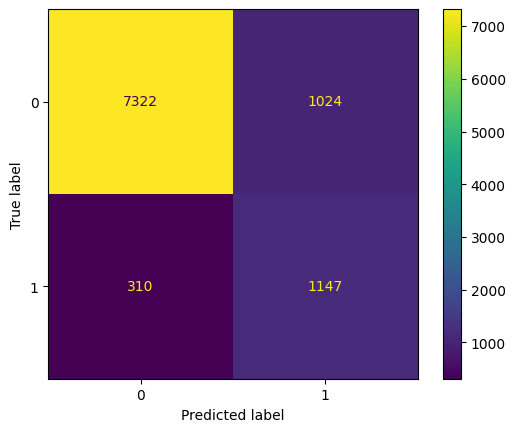

In [55]:
# Prediction on train and validation set . 

ypred_train=svm.predict(train_tf)
ypredict=svm.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))

#Displaying the confusion matrix

cm=confusion_matrix(y_val,ypredict)
cdisplay = ConfusionMatrixDisplay(cm)
cdisplay.plot()


#### 2.2 **Hyper tuning the SVM**

In [ ]:
# param_grid={
#     'kernel' : ['linear','rbf'],
#     'C' : [.01,.1,1,10],
#     'gamma' : [.01,.05,.1,1,10]}
# rn_grid=RandomizedSearchCV(SVC(random_state=42,class_weight={0:.8,1:2}),param_grid,cv=5,scoring='f1',n_jobs=-1,random_state=42)
# rn_grid.fit(train_tf,y_train)
# rn_grid.best_params_

**The best parameters obtained are**: 

{'kernel': 'rbf', 'gamma': 0.05, 'C': 0.1}=

In [60]:
#Retraining the model using best parameters
#svm=SVC(kernel='rbf',random_state=42,class_weight={0:.8,1:2},gamma=.05,C=.1)#(0.7655,0.7625)

#Changing the values of C
#C=0.5
#svm=SVC(kernel='rbf',random_state=42,class_weight={0:.8,1:2},gamma=.05,C=.5)#(0.7789,0.7688)
#C=1
svm=SVC(kernel='rbf',random_state=42,class_weight={0:.8,1:2},gamma=.05,C=1) #(0.7870,7714)
svm.fit(train_tf,y_train)

SVC(C=1, class_weight={0: 0.8, 1: 2}, gamma=0.05, random_state=42)

Training score   :  0.7878599239354092
validation score :  0.771678275534661


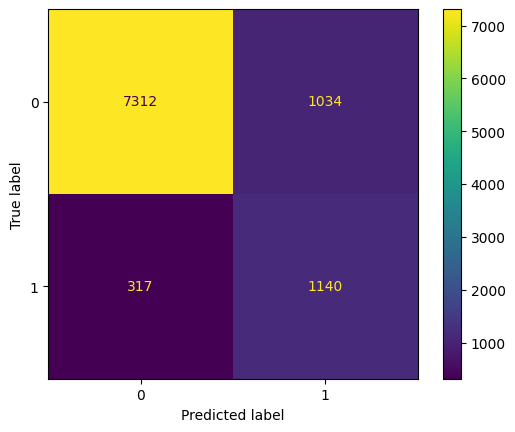

In [61]:
# Prediction of train and validation score

ypred_train=svm.predict(train_tf)
ypredict=svm.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))
svm_val=f1_score(y_val,ypredict,average='macro')
#Displaying the confusion matrix

cm=confusion_matrix(y_val,ypredict)
cdisplay = ConfusionMatrixDisplay(cm)
cdisplay.plot()

#### 2.3 Feature selection using SelectKbest

In [ ]:
# # Checking for which value of k, the model is performing well.
# K = range(20, 45)

#  for i in K :
#   skb = SelectKBest(mutual_info_classif, k = i)
#   train_tf_kbest = skb.fit_transform(train_tf, y_train)
#   val_tf_kbest =skb.transform(val_tf)
#   svm=SVC(kernel='rbf',random_state=42,class_weight={0:.8,1:2},gamma=.05,C=1)
#   svm.fit(train_tf_kbest, y_train)
#   ypredict = svm.predict(val_tf_kbest)
#   ypred_train = svm.predict(train_tf_kbest)
#   print('k=',i,"Train Score : ",f1_score(y_train,ypred_train,average='macro'),"Validation Score : ",f1_score(y_val,ypredict,average='macro'))

In [62]:
#for k=31, the model has given a good score.
np.random.seed(42)
select_k=SelectKBest(mutual_info_classif,k=31)
train_tf_selected=select_k.fit_transform(train_tf,y_train)
val_tf_selected = select_k.transform(val_tf)
X_test_tf_selected=select_k.transform(X_test_tf)

svm=SVC(kernel='rbf',random_state=42,class_weight={0:.8,1:2},gamma=.05,C=1)
svm.fit(train_tf_selected,y_train)
ypredict = svm.predict(val_tf_selected)
ypred_train = svm.predict(train_tf_selected)

print("Training Score   :",f1_score(y_train,ypred_train,average='macro'))
print("Validation score :",f1_score(y_val,ypredict,average='macro'))

Training Score   : 0.7785418478226055
Validation score : 0.7683885263214069


In [ ]:
# cm=confusion_matrix(y_val,ypredict)
# cdisplay=ConfusionMatrixDisplay(cm)
# cdisplay.plot()

# **Insights of SVM**

 ***Default Values :***

 Train Score is **0.80** and validation score is **0.77**. The model is clearly **overfitting**

 ***Tuning and training with best parameters :*** 

The training score (**0.7655**)  reduced and the validation score (**0.7625)** is more or less the same.

***Changing  the C value from 0.1 to 1***:

The training score **(0.7878)** and validation score **(0.7716)** improved significantly with the **public score of 0.76075**.

***Feature selection using SelectKBest***

The model trained with **31** features slightly reduced the score with the training score of **0.7785** and validation score of **0.7683**

# Model 3 : Decision Tree model

#### 3.1 Training the model with default parameters

In [63]:
dtc=DecisionTreeClassifier(class_weight = {0:.8,1:2},random_state=42)
dtc.fit(train_tf,y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 2}, random_state=42)

In [64]:
# Predicting the score 
ypred_train=dtc.predict(train_tf)
ypredict=dtc.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))
#print(classification_report(y_val,ypredict))

#The model is overfitting 

Training score   :  1.0
validation score :  0.6944053812529009


#### 3.2 **Hyper parameter tuning of the Decision Tree**

In [ ]:
# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'splitter' : ['best','random'],
#     'min_samples_leaf': [2,4,6,8,10],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': np.arange(2, 10),
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'class_weight': ['balanced', {0: .8, 1: 2},{0: 1, 1: 5}, {0:1,1:15}]

# dtc1=DecisionTreeClassifier(random_state=42)
# ran_search = RandomizedSearchCV(dtc1, param_distributions=param_dist,
#                                    n_iter=50, scoring='f1', cv=5,
#                                    random_state=42, n_jobs=-1, verbose=1)
# ran_search.fit(train_tf, y_train)
#ran_search.best_params_

***The best parameters given by the hyper parameter tuning are :***

{'splitter' : 'best', 'min_samples_split':4,min_samples_leaf':3,'max_depth' :10,'criterion' : 'gini', 'class_weight' : {0:.8,1:2}

In [65]:
# Training the model using best parameters
dtc_best=DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='best',min_samples_split = 4,max_features = None,
                                min_samples_leaf= 3,class_weight={0: 0.8, 1: 2},random_state=42) 
dtc_best.fit(train_tf,y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 2}, max_depth=10,
                       min_samples_leaf=3, min_samples_split=4,
                       random_state=42)

In [66]:
#Predicting ths score
ypred_train=dtc_best.predict(train_tf)
ypredict=dtc_best.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))
dtc_val=f1_score(y_val,ypredict,average='macro')

Training score   :  0.8030626855142917
validation score :  0.7554988068158996


In [ ]:
cm=confusion_matrix(y_val,ypredict)
cdisplay=ConfusionMatrixDisplay(confusion_matrix=cm)
cdisplay.plot()

### Insights of Decision Tree Classifier


* The model is **overfitting** for **default values** with training score of **1.0** and validation score of **0.69**
  
* The **hyper parameter tuning** improved the model's performance significantly with the         training score of  **0.8030** and the Validation score is **0.7554**



# Model 4 : Random Forest classifier

#### **4.1. Training Random forest classifier with default values**

In [68]:
rfc=RandomForestClassifier(class_weight={0:.8,1:2},random_state=42)
rfc.fit(train_tf,y_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 2}, random_state=42)

In [69]:
ypred_train=rfc.predict(train_tf)
ypredict=rfc.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))

Training score   :  1.0
validation score :  0.7026220610159609


#### 4.2 **Hyper parameter tuning**

In [ ]:
# param_grid = {
#     'n_estimators': [100,200,400,300],
#     'max_depth': [20,30,35,40],
#     'min_samples_split' : [15,20,30],
#     'min_samples_leaf' : [5,7,9,10],
#     'max_features' : ['sqrt','log2',np.arange(10,20,5)]}



# rf_gs = RandomizedSearchCV(RandomForestClassifier(random_state=42,class_weight={0:.8,1:2}),
#                            param_distributions = param_grid,
#                            random_state=42,
#                            n_iter=10,
#                            cv=5,
#                            verbose=2,
#                            n_jobs=-1,scoring='f1'
#                            )
# rf_gs.fit(train_tf,y_train)

# rf_gs.best_params_

In [ ]:
# pred_train=rf_gs.predict(train_tf)
# ypredict=rf_gs.predict(val_tf)

# # Printing the score

# print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
# print("validation score : ",f1_score(y_val,ypredict,average='macro'))

In [ ]:
# cm=confusion_matrix(y_val,ypredict)
# cdisplay = ConfusionMatrixDisplay(confusion_matrix=cm)
# cdisplay.plot()

#### 4.3 ***Retuned the parameter randomly to improve model's performance***

In [70]:
# rfc = RandomForestClassifier(n_estimators= 400,min_samples_split= 30,criterion='entropy',
#                           max_features=15,min_samples_leaf= 8,class_weight={0:.8,1:2},
#                              random_state=42) 
rfc = RandomForestClassifier(n_estimators= 900,min_samples_split=30,criterion='entropy',
                          max_features=15,min_samples_leaf= 7,class_weight={0:.8,1:2},
                             random_state=42) 
rfc.fit(train_tf,y_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 2}, criterion='entropy',
                       max_features=15, min_samples_leaf=7,
                       min_samples_split=30, n_estimators=900, random_state=42)

In [49]:
ypred_train=rfc.predict(train_tf)
ypredict=rfc.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))
rf_val=f1_score(y_val,ypredict,average='macro')
print(classification_report(y_val,ypredict))

Training score   :  0.8219032695175589
validation score :  0.7797071237667227
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8346
           1       0.54      0.78      0.64      1457

    accuracy                           0.87      9803
   macro avg       0.75      0.83      0.78      9803
weighted avg       0.90      0.87      0.88      9803



In [ ]:
cm=confusion_matrix(y_val,ypredict)
cdisplay = ConfusionMatrixDisplay(confusion_matrix=cm)
cdisplay.plot()

In [36]:
# rfc1=RandomForestClassifier(random_state=42,class_weight={0:.8,1:2})
# rfe_rfc=RFE(rfc1,n_features_to_select=15)
# rfe_rfc.fit(train_tf,y_train)

RFE(estimator=RandomForestClassifier(class_weight={0: 0.8, 1: 2},
                                     random_state=42),
    n_features_to_select=15)

In [37]:
# ypred_train=rfe_rfc.predict(train_tf)
# ypredict=rfe_rfc.predict(val_tf)

# # Printing the score

# print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
# print("validation score : ",f1_score(y_val,ypredict,average='macro'))
# rf_val=f1_score(y_val,ypredict,average='macro')
# print(classification_report(y_val,ypredict))

Training score   :  1.0
validation score :  0.7015968598869196
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      8346
           1       0.62      0.39      0.48      1457

    accuracy                           0.87      9803
   macro avg       0.76      0.67      0.70      9803
weighted avg       0.86      0.87      0.86      9803



### Insights of RandomForest Classifier


* The model is **overfitting** for **default values** with training score of **1.0** and validation score of **0.70**
  
* The **hyper parameter tuning** of the model improved the validation score and no overfitting. The model performs well on unseen data. Training score of  **0.7499** and the Validation score is **0.7753**

* Retuned the model with more estimators to improve the training score and. This achieved a **public score of 0.77400** The training score improved to  **0.8219** and the validation score improved to **0.7797**

# Model 5 : Voting Classifier

#### **5.1. Training Voting Classifier with default values**

In [ ]:
# clf1 = DecisionTreeClassifier(random_state=42,class_weight={0: .8, 1: 2})
# clf2 = RandomForestClassifier(class_weight={0:.8,1:2},random_state=42)
# clf3= AdaBoostClassifier(random_state=42)
# vt_clf=VotingClassifier(estimators=[('dt',clf1),('rf',clf2),('adb',clf3)])
# vt_clf.fit(train_tf,y_train)

In [ ]:
# ypred_train=vt_clf.predict(train_tf)
# ypredict=vt_clf.predict(val_tf)

# # Printing the score

# print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
# print("validation score : ",f1_score(y_val,ypredict,average='macro'))
# #print(classification_report(y_val,ypredict))

#### **5.2. Training Voting Classifier with the 3 best performing models**

In [37]:
clf1 = DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='best',
                              min_samples_split = 15,max_features = None,
                              min_samples_leaf= 9,class_weight={0: .8, 1: 2},
                              random_state=42)
    
# clf2 = RandomForestClassifier(n_estimators= 400,min_samples_split= 30,criterion='entropy',
#                               max_features=15,min_samples_leaf= 8,class_weight={0:.8,1:2},
#                               random_state=42) 
clf2= RandomForestClassifier(n_estimators= 1000,min_samples_split=25,criterion='entropy',
                          max_features=15,min_samples_leaf= 8,class_weight={0:.8,1:2},
                             random_state=42) 
clf3=  AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7,min_samples_leaf=12,
                                                           min_samples_split=50,
                                                           max_features=15,
                                                           class_weight={0:.8,1:2},
                                                           random_state=42),
                         n_estimators=600,learning_rate=.008,random_state=42)
clf4=SVC(kernel='rbf',random_state=42,class_weight={0:.8,1:2},C=1,gamma=.05)
pos=np.where(y_train==1)[0]
neg=np.where(y_train==0)[0]

clf5 =  XGBClassifier(n_estimators=700,scale_pos_weight=len(neg)/len(pos),subsample=.8,max_depth=7,learning_rate=0.02,
                   reg_lambda=.05,reg_alpha=0.01,gamma=1.5,min_child_weight=5,colsample_bytree=0.8,random_state=42)

#vt_clf=VotingClassifier(estimators=[('dt',clf1),('rf',clf2),('adb',clf3)],voting='hard',weights=[1,2,1])
vt_clf=VotingClassifier(estimators=[('dt',clf1),('rf',clf2),('adb',clf3),('svm',clf4),('xgb',clf5)],voting='hard',weights=[1,2,2,1,2])
#vt_clf=VotingClassifier(estimators=[('dt',clf1),('rf',clf2),('xgb',clf5),('svm',clf4)],voting='hard',weights=[1,2,2,2])
#vt_clf=VotingClassifier(estimators=[('dt',clf1),('rf',clf2),('adb',clf3),('svm',clf4)],voting='soft')
vt_clf.fit(train_tf,y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight={0: 0.8,
                                                                   1: 2},
                                                     max_depth=10,
                                                     min_samples_leaf=9,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 0.8,
                                                                   1: 2},
                                                     criterion='entropy',
                                                     max_features=15,
                                                     min_samples_leaf=8,
                                                     min_samples_split=25,
                                                     n_estimators=1000,
                                                     random_state=42)),
                             ('adb',
                              AdaBoostClassifier(esti...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.02, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None, min_child_weight=5,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=700, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 weights=[1, 2, 2, 1, 2])

In [38]:
ypred_train=vt_clf.predict(train_tf)
ypredict=vt_clf.predict(val_tf)

# Printing the score

print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
print("validation score : ",f1_score(y_val,ypredict,average='macro'))
vot_val=f1_score(y_val,ypredict,average='macro')


Training score   :  0.820458502697121
validation score :  0.7783838654240967


In [ ]:
print(classification_report(y_val,ypredict))

In [ ]:
cm=confusion_matrix(y_val,ypredict)
cdisplay = ConfusionMatrixDisplay(confusion_matrix=cm)
cdisplay.plot()

### Insights from Voting Classifier

- The model is overfitting with default values with train score of 1.0 and validation score of 0.7021.
  
- The model was again trained with **3 best performing models** (DTC,RFC and Adaboost) as **estimators**. It improved the score significantly with **training score of 0.8235** and **validation score of 0.7787** and reduced overfitting to a greater extent.

- **Hard** voting slightly gave a better score than **soft** voting
  
- This model gave the **highest public score of 0.77493** in kaggle
 

# Model 6 : XGBOOST classifier


In [ ]:
# pos=np.where(y_train==1)[0]
# neg=np.where(y_train==0)[0]
# ratio=len(neg)/len(pos)
# print(ratio)
# xgb_clf =  XGBClassifier(n_estimators=1000,scale_pos_weight=(len(neg)/len(pos)),subsample=.8,max_depth=7,learning_rate=0.02,
#                    reg_lambda=1,reg_alpha=0.2,gamma=1.2,min_child_weight=3,colsample_bytree=0.8,random_state=42)
# xgb_clf.fit(train_tf,y_train)


In [ ]:
# ypred_train=xgb_clf.predict(train_tf)
# ypredict=xgb_clf.predict(val_tf)

# # Printing the score

# print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
# print("validation score : ",f1_score(y_val,ypredict,average='macro'))
# xgb_val=f1_score(y_val,ypredict,average='macro')
print(classification_report(y_val,ypredict))

# Model 7 : AdaBoost Classifier

In [17]:
# adb_clf=  AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7,min_samples_leaf=12,
#                                                            min_samples_split=50,
#                                                            max_features=15,
#                                                            class_weight={0:.8,1:2},
#                                                            random_state=42),
#                          n_estimators=600,learning_rate=.008,random_state=42)
# adb_clf.fit(train_tf,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.8, 1: 2},
                                                    max_depth=7,
                                                    max_features=15,
                                                    min_samples_leaf=12,
                                                    min_samples_split=50,
                                                    random_state=42),
                   learning_rate=0.008, n_estimators=600, random_state=42)

In [19]:
# ypred_train=adb_clf.predict(train_tf)
# ypredict=adb_clf.predict(val_tf)

# # Printing the score

# print("Training score   : " ,f1_score(y_train,ypred_train,average='macro'))
# print("validation score : ",f1_score(y_val,ypredict,average='macro'))
# adb_val=f1_score(y_val,ypredict,average='macro')
# print(classification_report(y_val,ypredict))

Training score   :  0.8391940332730616
validation score :  0.7749163640902783
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8346
           1       0.54      0.75      0.63      1457

    accuracy                           0.87      9803
   macro avg       0.75      0.82      0.77      9803
weighted avg       0.89      0.87      0.88      9803



# Model 8 : LightGBM classifier

In [13]:
# cl_wt= {0:.8, 1:2}
# lgbm_hyper = LGBMClassifier(n_estimators=800,class_weight=cl_wt,
 
#     learning_rate=0.03,
#     max_depth=10,
#     min_child_samples=6,
#     num_leaves=25,
#     colsample_bytree=0.8,subsample=0.6,reg_lambda=0.1,reg_alpha=0.3,
#     random_state=42,
#     )
# lgbm_hyper.fit(train_tf,y_train)

[LightGBM] [Info] Number of positive: 4370, number of negative: 25038
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 29408, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303784 -> initscore=-0.829341
[LightGBM] [Info] Start training from score -0.829341


LGBMClassifier(class_weight={0: 0.8, 1: 2}, colsample_bytree=0.8,
               learning_rate=0.03, max_depth=10, min_child_samples=6,
               n_estimators=800, num_leaves=25, random_state=42, reg_alpha=0.3,
               reg_lambda=0.1, subsample=0.6)

In [14]:
# ypred_train =lgbm_hyper.predict(train_tf)
# #ypred_train=vt_clf.predict(train_tf_selected)
# #ypredict=vt_clf.predict(val_tf_selected)
# ypredict=lgbm_hyper.predict(val_tf)
# print("Training score : ",f1_score(y_train,ypred_train,average='macro'))
# print("Validation score :",f1_score(y_val,ypredict,average='macro'))
# print(classification_report(y_val,ypredict))

Training score :  0.8389041445429035
Validation score : 0.7830710991948162
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8346
           1       0.54      0.80      0.65      1457

    accuracy                           0.87      9803
   macro avg       0.75      0.84      0.78      9803
weighted avg       0.90      0.87      0.88      9803



# Summary of performances of the 5 models trained

In [ ]:
X=['SGD','SVM','DTC','RFC','Voting Classifier']
Y=[sgd_val,svm_val,dtc_val,rf_val,vot_val]


# Create a bar chart
bars = plt.bar(X, Y, color='green',width=0.5)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 validation score')
plt.title('Bar Chart')
plt.xticks()
plt.yticks()
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(yval, 4)}', 
             ha='center', va='bottom')  # Position text at the top of each bar

# Display the plot
plt.show()


### To Summarise, 

##### - The **Voting Classifier** and the **RandomForest Classifier** are the best 

#####   performing models out of the 5 models trained. 

# Predicting the test data before submission 

In [51]:
# ypred=sgd_new.predict(X_test_tf)  
#ypred=svm.predict(X_test_tf) 
# ypred=dtc_best.predict(X_test_tf) 
ypred=rfc.predict(X_test_tf)
#ypred=rf_clf.predict(X_test_tf)
#ypred=vt_clf.predict(X_test_tf)
#ypred=lgbm_hyper.predict(X_test_tf)
#ypred=adb_clf.predict(X_test_tf)

## Submission 

In [52]:
 submission = pd.DataFrame({"id": range(0,X_test.shape[0]), 
                           "target": ypred}) 
 submission['target']=submission['target'].replace({1:'yes',0:'no'})
 submission.to_csv('/kaggle/working/submission.csv',index=False)
    
# #     saved_file = pd.read_csv('submission.csv')
# #     print(saved_file.head())  # Print the first few rows to verify
#  print("successful")
#  import os
#  print(os.getcwd())
#  print(os.listdir('.'))

#     # List files in the kaggle/competition folder
#  print(os.listdir('/kaggle/working'))